## Multiple Disease Prediction System - 5.) Parkinson's Disease

In [97]:
#Importing Necessary Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [98]:
#Reading The Data Using Pandas Library (Data From A csv File Into A Pandas Dataframe)

data=pd.read_csv("/content/Parkinson's Disease.csv")

### Dataset Link:https://www.kaggle.com/datasets/vikasukani/parkinsons-disease-data-set

In [99]:
#Check The Type Of Data

type(data)

pandas.core.frame.DataFrame

In [100]:
#Basic Information About The Data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [101]:
#Renaming The Columns

data=data.rename(columns={"name":"Name","status":"Status","spread1":"Spread1","spread2":"Spread2"})

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [103]:
data.head()

,Name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,Status,RPDE,DFA,Spread1,Spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [104]:
data.tail()

,Name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,Status,RPDE,DFA,Spread1,Spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [105]:
#To Get The Statistical Insight From The Dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [106]:
#Checking Missing Values In The Dataset

data.isnull().sum()

Name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
Status              0
RPDE                0
DFA                 0
Spread1             0
Spread2             0
D2                  0
PPE                 0
dtype: int64

In [107]:
#Dropping Unnwanted Columns

data.drop(labels=["Name"],axis=1,inplace=True)

In [108]:
#To See How Many Status States Are There In The Dataset

data["Status"].value_counts()

1    147
0     48
Name: Status, dtype: int64

<Axes: xlabel='Status', ylabel='count'>

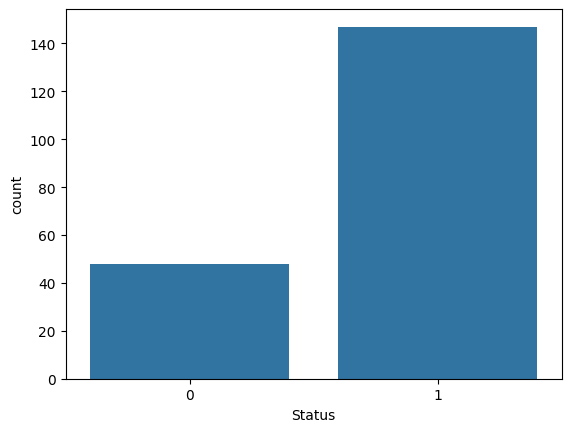

In [109]:
#Plotting The Count Plot Of Status

sns.countplot(x="Status",data=data)

0=No Parkinson's Disease,
1=Parkinson's Disease

<ipython-input-110-5e7cf80af03b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Status"])


<Axes: xlabel='Status', ylabel='Density'>

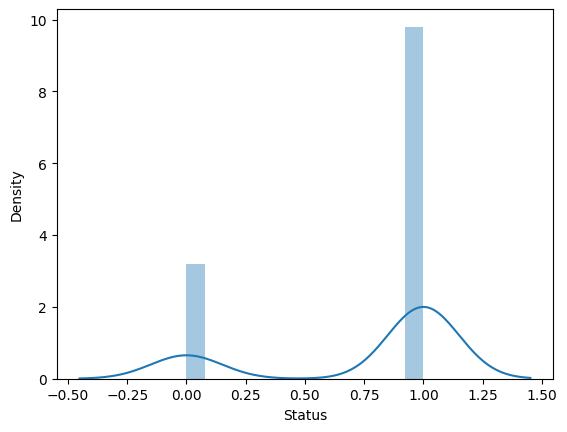

In [110]:
#Plotting The Distribution Plot Of Status

sns.distplot(data["Status"])

array([[<Axes: title={'center': 'MDVP:Fo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Fhi(Hz)'}>,
        <Axes: title={'center': 'MDVP:Flo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Jitter(%)'}>,
        <Axes: title={'center': 'MDVP:Jitter(Abs)'}>],
       [<Axes: title={'center': 'MDVP:RAP'}>,
        <Axes: title={'center': 'MDVP:PPQ'}>,
        <Axes: title={'center': 'Jitter:DDP'}>,
        <Axes: title={'center': 'MDVP:Shimmer'}>,
        <Axes: title={'center': 'MDVP:Shimmer(dB)'}>],
       [<Axes: title={'center': 'Shimmer:APQ3'}>,
        <Axes: title={'center': 'Shimmer:APQ5'}>,
        <Axes: title={'center': 'MDVP:APQ'}>,
        <Axes: title={'center': 'Shimmer:DDA'}>,
        <Axes: title={'center': 'NHR'}>],
       [<Axes: title={'center': 'HNR'}>,
        <Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'RPDE'}>,
        <Axes: title={'center': 'DFA'}>,
        <Axes: title={'center': 'Spread1'}>],
       [<Axes: title={'center': 'Spread2'}>,
   

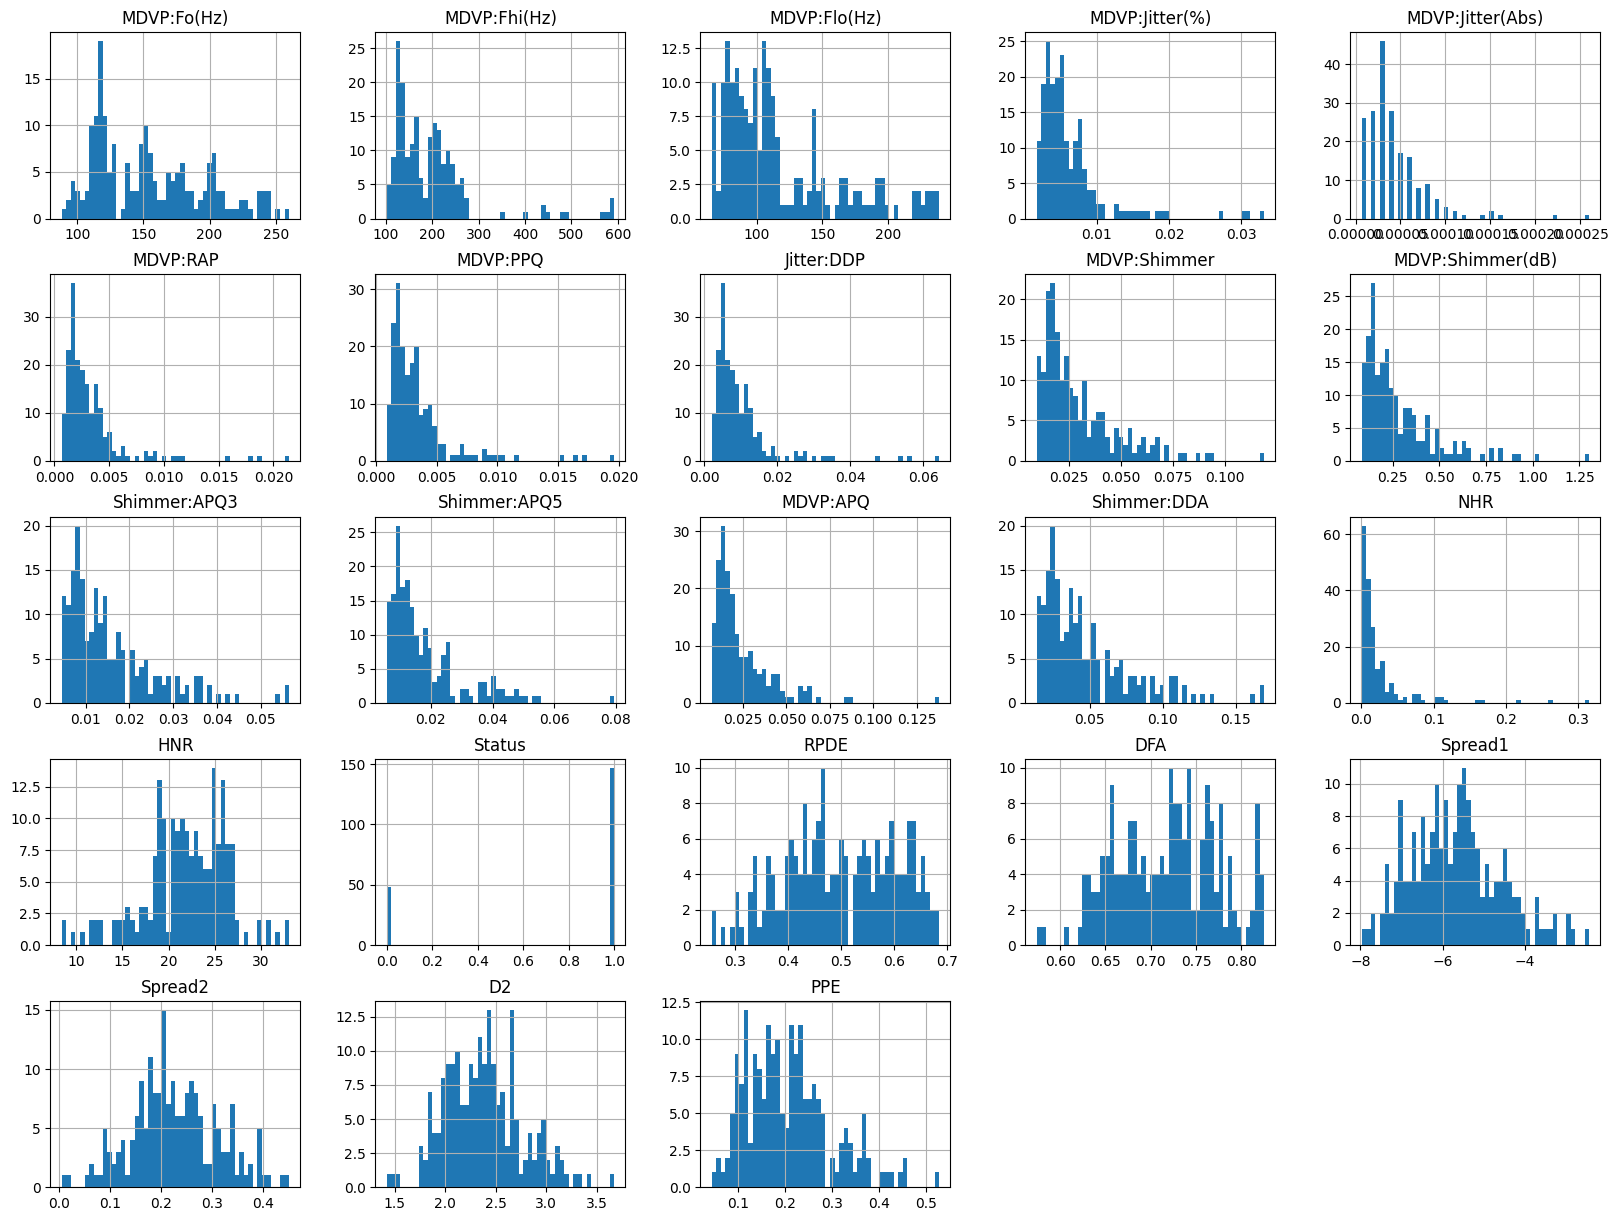

In [111]:
#Plotting The Histogram Of The Various Features

data.hist(bins=50,figsize=(20,15))

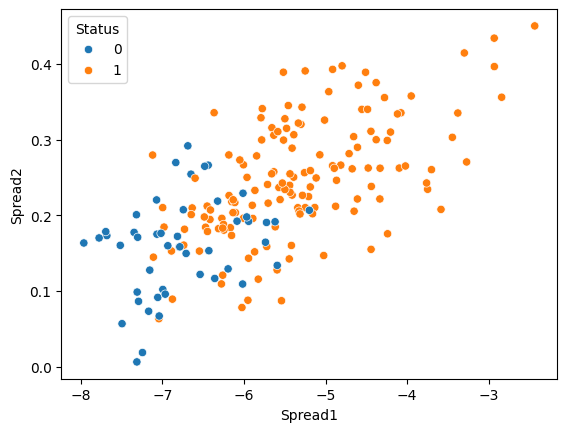

In [112]:
#Plotting The Scatterplot By Projecting Status Based on Two Features Spread1 And Spread2

sns.scatterplot(data=data,x="Spread1",y="Spread2",hue="Status")
plt.show()

In [113]:
#To Find Correlation Among The Columns In The Dataframe

corr_matrix=data.corr()
corr_matrix

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,Status,RPDE,DFA,Spread1,Spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [114]:
#Plotting The Heatmap

plt.figure(figsize=(100,100))
plt.title("Correlation Plot")
sns.heatmap(data.corr(),annot=True,cmap="seismic")
plt.show()

In [115]:
#Finding The Variables Which Has The Highest Correlation With The Target Variable (Status)

corr_matrix["Status"].sort_values(ascending=False)

Status              1.000000
Spread1             0.564838
PPE                 0.531039
Spread2             0.454842
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)       -0.166136
HNR                -0.361515
MDVP:Flo(Hz)       -0.380200
MDVP:Fo(Hz)        -0.383535
Name: Status, dtype: float64

In [116]:
#Categorizing The Data

x=data.drop(columns=["Status"],axis=1)
y=data.Status

In [117]:
#Splitting The Data Into Training Set And Test Set

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [118]:
#Scaling Of Data

scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [119]:
#Decision Tree Classifier

In [120]:
dtc=DecisionTreeClassifier(max_depth=3)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [121]:
y_pred1=dtc.predict(x_test)
print(y_pred1)

[1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1]


In [122]:
a1=accuracy_score(y_test,y_pred1)
p1=precision_score(y_test,y_pred1)
r1=recall_score(y_test,y_pred1)
f1=f1_score(y_test,y_pred1)

In [123]:
print("Accuracy   :", a1)
print("Precision  :", p1)
print("Recall     :", r1)
print("F1-Score   :", f1)

Accuracy   : 0.8813559322033898
Precision  : 0.9545454545454546
Recall     : 0.8936170212765957
F1-Score   : 0.9230769230769231


In [124]:
#K-Nearest Neigbour Classifier

In [125]:
knnc=KNeighborsClassifier(n_neighbors=8)
knnc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [126]:
y_pred2=knnc.predict(x_test)
print(y_pred2)

[1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1]


In [127]:
a2=accuracy_score(y_test,y_pred2)
p2=precision_score(y_test,y_pred2)
r2=recall_score(y_test,y_pred2)
f2=f1_score(y_test,y_pred2)

In [128]:
print("Accuracy   :", a2)
print("Precision  :", p2)
print("Recall     :", r2)
print("F1-Score   :", f2)

Accuracy   : 0.8135593220338984
Precision  : 0.9090909090909091
Recall     : 0.851063829787234
F1-Score   : 0.8791208791208791


In [129]:
#Logistic Regression

In [130]:
logr=LogisticRegression()
logr.fit(x_train,y_train)

LogisticRegression()

In [131]:
y_pred3=logr.predict(x_test)
print(y_pred3)

[1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1]


In [132]:
a3=accuracy_score(y_test,y_pred3)
p3=precision_score(y_test,y_pred3)
r3=recall_score(y_test,y_pred3)
f3=f1_score(y_test,y_pred3)

In [133]:
print("Accuracy   :", a3)
print("Precision  :", p3)
print("Recall     :", r3)
print("F1-Score   :", f3)

Accuracy   : 0.7457627118644068
Precision  : 0.8809523809523809
Recall     : 0.7872340425531915
F1-Score   : 0.8314606741573034


In [134]:
#Naive Bayes Algorithm

In [135]:
nbc=GaussianNB()
nbc.fit(x_train,y_train)

GaussianNB()

In [136]:
y_pred4=nbc.predict(x_test)
print(y_pred4)

[1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1
 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1]


In [137]:
a4=accuracy_score(y_test,y_pred4)
p4=precision_score(y_test,y_pred4)
r4=recall_score(y_test,y_pred4)
f4=f1_score(y_test,y_pred4)

In [138]:
print("Accuracy   :", a4)
print("Precision  :", p4)
print("Recall     :", r4)
print("F1-Score   :", f4)

Accuracy   : 0.6440677966101694
Precision  : 0.8823529411764706
Recall     : 0.6382978723404256
F1-Score   : 0.7407407407407407


In [139]:
#Neural Network Classifier

In [140]:
nnc=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1)
nnc.fit(x_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [141]:
y_pred5=nnc.predict(x_test)
print(y_pred5)

[1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1]


In [142]:
a5=accuracy_score(y_test,y_pred5)
p5=precision_score(y_test,y_pred5)
r5=recall_score(y_test,y_pred5)
f5=f1_score(y_test,y_pred5)

In [143]:
print("Accuracy   :", a5)
print("Precision  :", p5)
print("Recall     :", r5)
print("F1-Score   :", f5)

Accuracy   : 0.711864406779661
Precision  : 0.9166666666666666
Recall     : 0.7021276595744681
F1-Score   : 0.7951807228915662


In [144]:
#Random Forest

In [145]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [146]:
y_pred6=rfc.predict(x_test)
print(y_pred6)

[1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1]


In [147]:
a6=accuracy_score(y_test,y_pred6)
p6=precision_score(y_test,y_pred6)
r6=recall_score(y_test,y_pred6)
f6=f1_score(y_test,y_pred6)

In [148]:
print("Accuracy   :", a6)
print("Precision  :", p6)
print("Recall     :", r6)
print("F1-Score   :", f6)

Accuracy   : 0.847457627118644
Precision  : 0.9130434782608695
Recall     : 0.8936170212765957
F1-Score   : 0.9032258064516129


In [149]:
#Support Vector Machine

In [150]:
svm=SVC(kernel='rbf',decision_function_shape='ovo',C=1.0)
svm.fit(x_train,y_train)

SVC(decision_function_shape='ovo')

In [151]:
y_pred7=svm.predict(x_test)
print(y_pred7)

[1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [152]:
a7=accuracy_score(y_test,y_pred7)
p7=precision_score(y_test,y_pred7)
r7=recall_score(y_test,y_pred7)
f7=f1_score(y_test,y_pred7)

In [153]:
print("Accuracy   :", a7)
print("Precision  :", p7)
print("Recall     :", r7)
print("F1-Score   :", f7)

Accuracy   : 0.8813559322033898
Precision  : 0.9
Recall     : 0.9574468085106383
F1-Score   : 0.9278350515463918


In [154]:
#XgBoost Classifier

In [155]:
xgc=GradientBoostingClassifier()
xgc.fit(x_train,y_train)

GradientBoostingClassifier()

In [156]:
y_pred8=xgc.predict(x_test)
print(y_pred8)

[1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1]


In [157]:
a8=accuracy_score(y_test,y_pred8)
p8=precision_score(y_test,y_pred8)
r8=recall_score(y_test,y_pred8)
f8=f1_score(y_test,y_pred8)

In [158]:
print("Accuracy   :", a8)
print("Precision  :", p8)
print("Recall     :", r8)
print("F1-Score   :", f8)

Accuracy   : 0.8813559322033898
Precision  : 0.9545454545454546
Recall     : 0.8936170212765957
F1-Score   : 0.9230769230769231


In [159]:
#Comparing Accuracy Values

Naive Bayes 0.6440677966101694
Neural Network 0.711864406779661
Logistic Regression 0.7457627118644068
K-Nearest Neighbor 0.8135593220338984
Random Forest 0.847457627118644
Decision Tree 0.8813559322033898
Support Vector Machine 0.8813559322033898
XgBoost 0.8813559322033898


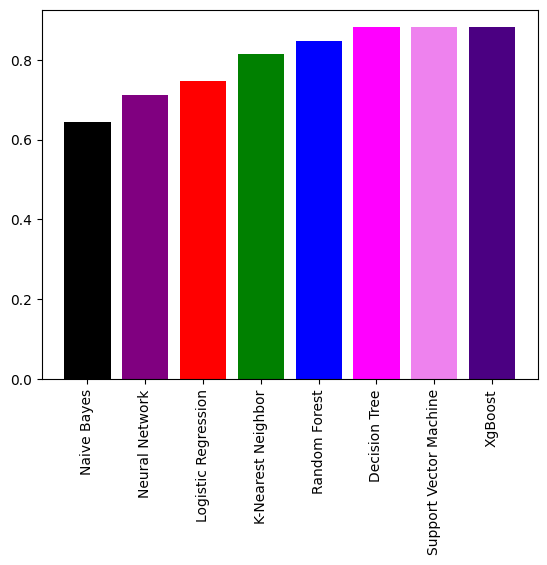

In [160]:
acc_models={"Decision Tree":a1,"K-Nearest Neighbor":a2,"Logistic Regression":a3,"Naive Bayes":a4,"Neural Network":a5,"Random Forest":a6,"Support Vector Machine":a7,"XgBoost":a8}

sorted_models=sorted(acc_models.items(),key=lambda x:x[1])

for key,value in sorted_models:
    print(key,value)

acc_models={"Decision Tree":a1,"K-Nearest Neighbor":a2,"Logistic Regression":a3,"Naive Bayes":a4,"Neural Network":a5,"Random Forest":a6,"Support Vector Machine":a7,"XgBoost":a8}

acc_keys,acc_values=zip(*sorted(zip(acc_models.keys(),acc_models.values()),key=lambda x:x[1]))

plt.bar(range(len(acc_models)),acc_values,tick_label=acc_keys,color=["black","purple","red","green","blue","magenta","violet","indigo"])
plt.xticks(rotation=90)
plt.show()

In [161]:
#Comparing Precision Values

Logistic Regression 0.8809523809523809
Naive Bayes 0.8823529411764706
Support Vector Machine 0.9
K-Nearest Neighbor 0.9090909090909091
Random Forest 0.9130434782608695
Neural Network 0.9166666666666666
Decision Tree 0.9545454545454546
XgBoost 0.9545454545454546


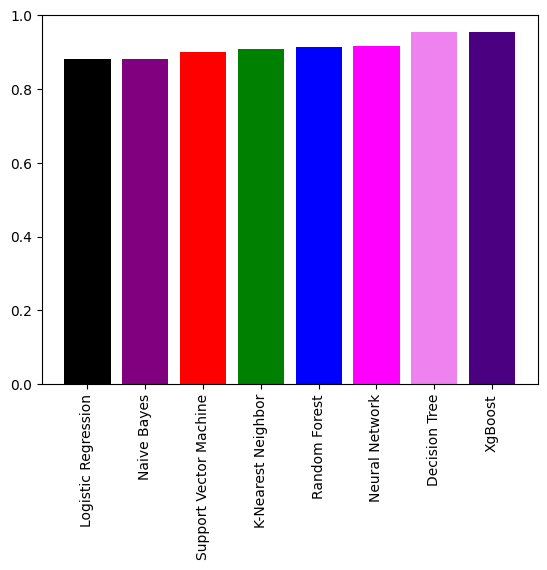

In [162]:
pre_models={"Decision Tree":p1,"K-Nearest Neighbor":p2,"Logistic Regression":p3,"Naive Bayes":p4,"Neural Network":p5,"Random Forest":p6,"Support Vector Machine":p7,"XgBoost":p8}

sorted_models=sorted(pre_models.items(),key=lambda x:x[1])

for key,value in sorted_models:
    print(key,value)

pre_models={"Decision Tree":p1,"K-Nearest Neighbor":p2,"Logistic Regression":p3,"Naive Bayes":p4,"Neural Network":p5,"Random Forest":p6,"Support Vector Machine":p7,"XgBoost":p8}

pre_keys,pre_values=zip(*sorted(zip(pre_models.keys(),pre_models.values()),key=lambda x:x[1]))

plt.bar(range(len(pre_models)),pre_values,tick_label=pre_keys,color=["black","purple","red","green","blue","magenta","violet","indigo"])
plt.xticks(rotation=90)
plt.show()

In [163]:
#Comparing Recall Values

Naive Bayes 0.6382978723404256
Neural Network 0.7021276595744681
Logistic Regression 0.7872340425531915
K-Nearest Neighbor 0.851063829787234
Decision Tree 0.8936170212765957
Random Forest 0.8936170212765957
XgBoost 0.8936170212765957
Support Vector Machine 0.9574468085106383


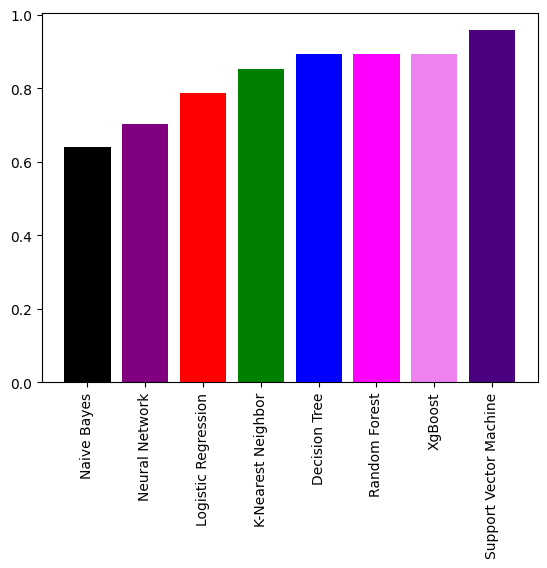

In [164]:
rec_models={"Decision Tree":r1,"K-Nearest Neighbor":r2,"Logistic Regression":r3,"Naive Bayes":r4,"Neural Network":r5,"Random Forest":r6,"Support Vector Machine":r7,"XgBoost":r8}

sorted_models=sorted(rec_models.items(),key=lambda x:x[1])

for key,value in sorted_models:
    print(key,value)

rec_models={"Decision Tree":r1,"K-Nearest Neighbor":r2,"Logistic Regression":r3,"Naive Bayes":r4,"Neural Network":r5,"Random Forest":r6,"Support Vector Machine":r7,"XgBoost":r8}

rec_keys,rec_values=zip(*sorted(zip(rec_models.keys(),rec_models.values()),key=lambda x:x[1]))

plt.bar(range(len(rec_models)),rec_values,tick_label=rec_keys,color=["black","purple","red","green","blue","magenta","violet","indigo"])
plt.xticks(rotation=90)
plt.show()

In [165]:
#Comparing F1-Score

Naive Bayes 0.7407407407407407
Neural Network 0.7951807228915662
Logistic Regression 0.8314606741573034
K-Nearest Neighbor 0.8791208791208791
Random Forest 0.9032258064516129
Decision Tree 0.9230769230769231
XgBoost 0.9230769230769231
Support Vector Machine 0.9278350515463918


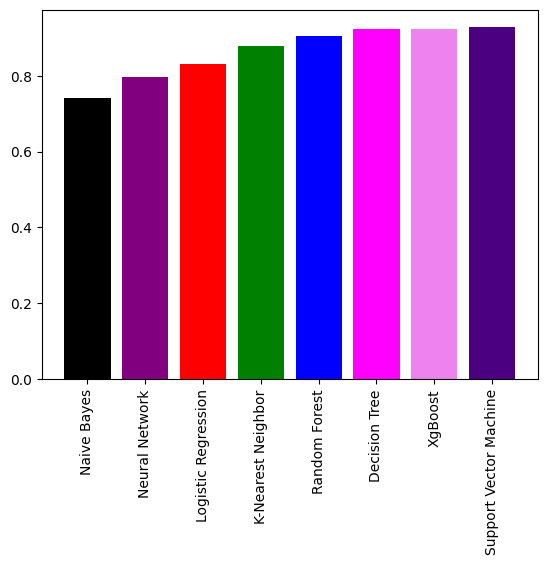

In [166]:
f1_models={"Decision Tree":f1,"K-Nearest Neighbor":f2,"Logistic Regression":f3,"Naive Bayes":f4,"Neural Network":f5,"Random Forest":f6,"Support Vector Machine":f7,"XgBoost":f8}

sorted_models=sorted(f1_models.items(),key=lambda x:x[1])

for key,value in sorted_models:
    print(key,value)

f1_models={"Decision Tree":f1,"K-Nearest Neighbor":f2,"Logistic Regression":f3,"Naive Bayes":f4,"Neural Network":f5,"Random Forest":f6,"Support Vector Machine":f7,"XgBoost":f8}

f1_keys,f1_values=zip(*sorted(zip(f1_models.keys(),f1_models.values()),key=lambda x:x[1]))

plt.bar(range(len(f1_models)),f1_values,tick_label=f1_keys,color=["black","purple","red","green","blue","magenta","violet","indigo"])
plt.xticks(rotation=90)
plt.show()

In [167]:
#Plotting All Accuracy,Precision,Recall And F1-Score Of All The Models

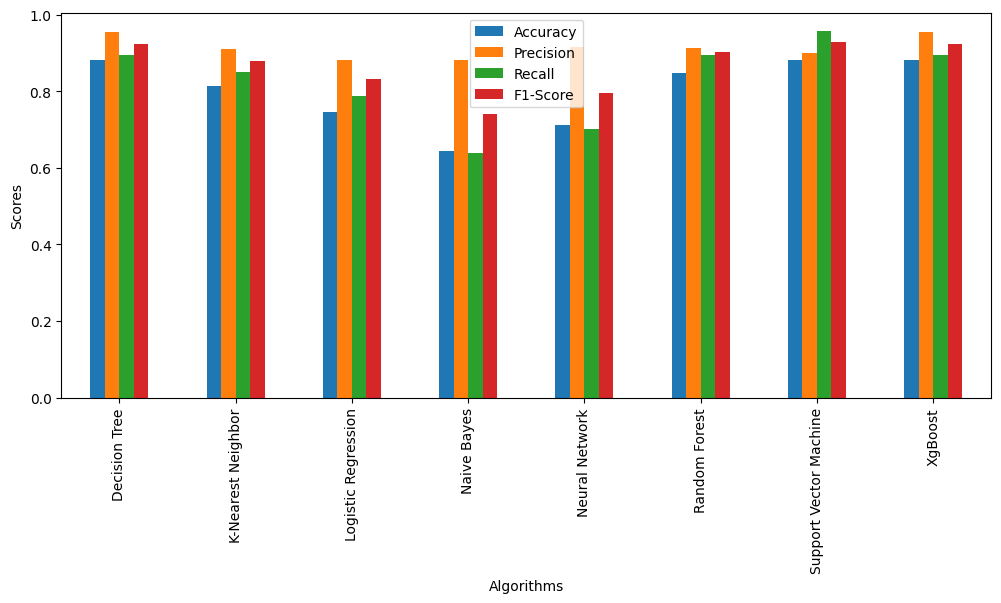

In [168]:
models_data=pd.DataFrame([["Decision Tree",a1,p1,r1,f1],["K-Nearest Neighbor",a2,p2,r2,f2],["Logistic Regression",a3,p3,r3,f3],["Naive Bayes",a4,p4,r4,f4],["Neural Network",a5,p5,r5,f5],["Random Forest",a6,p6,r6,f6],["Support Vector Machine",a7,p7,r7,f7],["XgBoost",a8,p8,r8,f8]],columns=["Scores","Accuracy","Precision","Recall","F1-Score"])
models_data.plot(x="Scores",kind="bar",stacked=False,xlabel="Algorithms",ylabel="Scores",figsize=(12,5))
plt.show()

In [169]:
#Saving The Trained Model

import pickle

filename="Parkinsons_Disease.sav"
pickle.dump(xgc,open(filename,"wb"))

filename="Parkinsons_Disease_Scale.sav"
pickle.dump(scale,open(filename,"wb"))

In [170]:
#Loading The Saved Model

loaded_model=pickle.load(open("Parkinsons_Disease.sav","rb"))
loaded_model=pickle.load(open("Parkinsons_Disease_Scale.sav","rb"))